In [9]:
# Diffient optimizer

In [10]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import optimizers



In [11]:
# Get data
Data = pd.read_csv('iris.csv',header = None)


# Variables
[m,n] = Data.shape
fn = n - 1

trainNum = int(m * 0.7)

# Shuffle data
Data = Data.sample(frac=1).reset_index(drop=True)
# Seperate data into X y
DataX = Data.iloc[:,0:fn]
DataY = Data.iloc[:,fn]

# Seperate data into train test
trainX = DataX.iloc[0:trainNum,:].values
trainY = DataY.iloc[0:trainNum].values
testX = DataX.iloc[trainNum:,].values
testY = DataY.iloc[trainNum:,].values



l1 lambda 0 accuracy = 0.977777779102
l1 lambda 0.001 accuracy = 0.977777779102
l1 lambda 0.01 accuracy = 0.288888901472
l1 lambda 0.05 accuracy = 0.288888901472
l1 lambda 0.1 accuracy = 0.288888901472
l1 lambda 1 accuracy = 0.288888901472
l1 lambda 10 accuracy = 0.288888901472
l1 lambda 100 accuracy = 0.288888901472
l1 lambda 1000 accuracy = 0.288888901472
l1 lambda 10000 accuracy = 0.288888901472


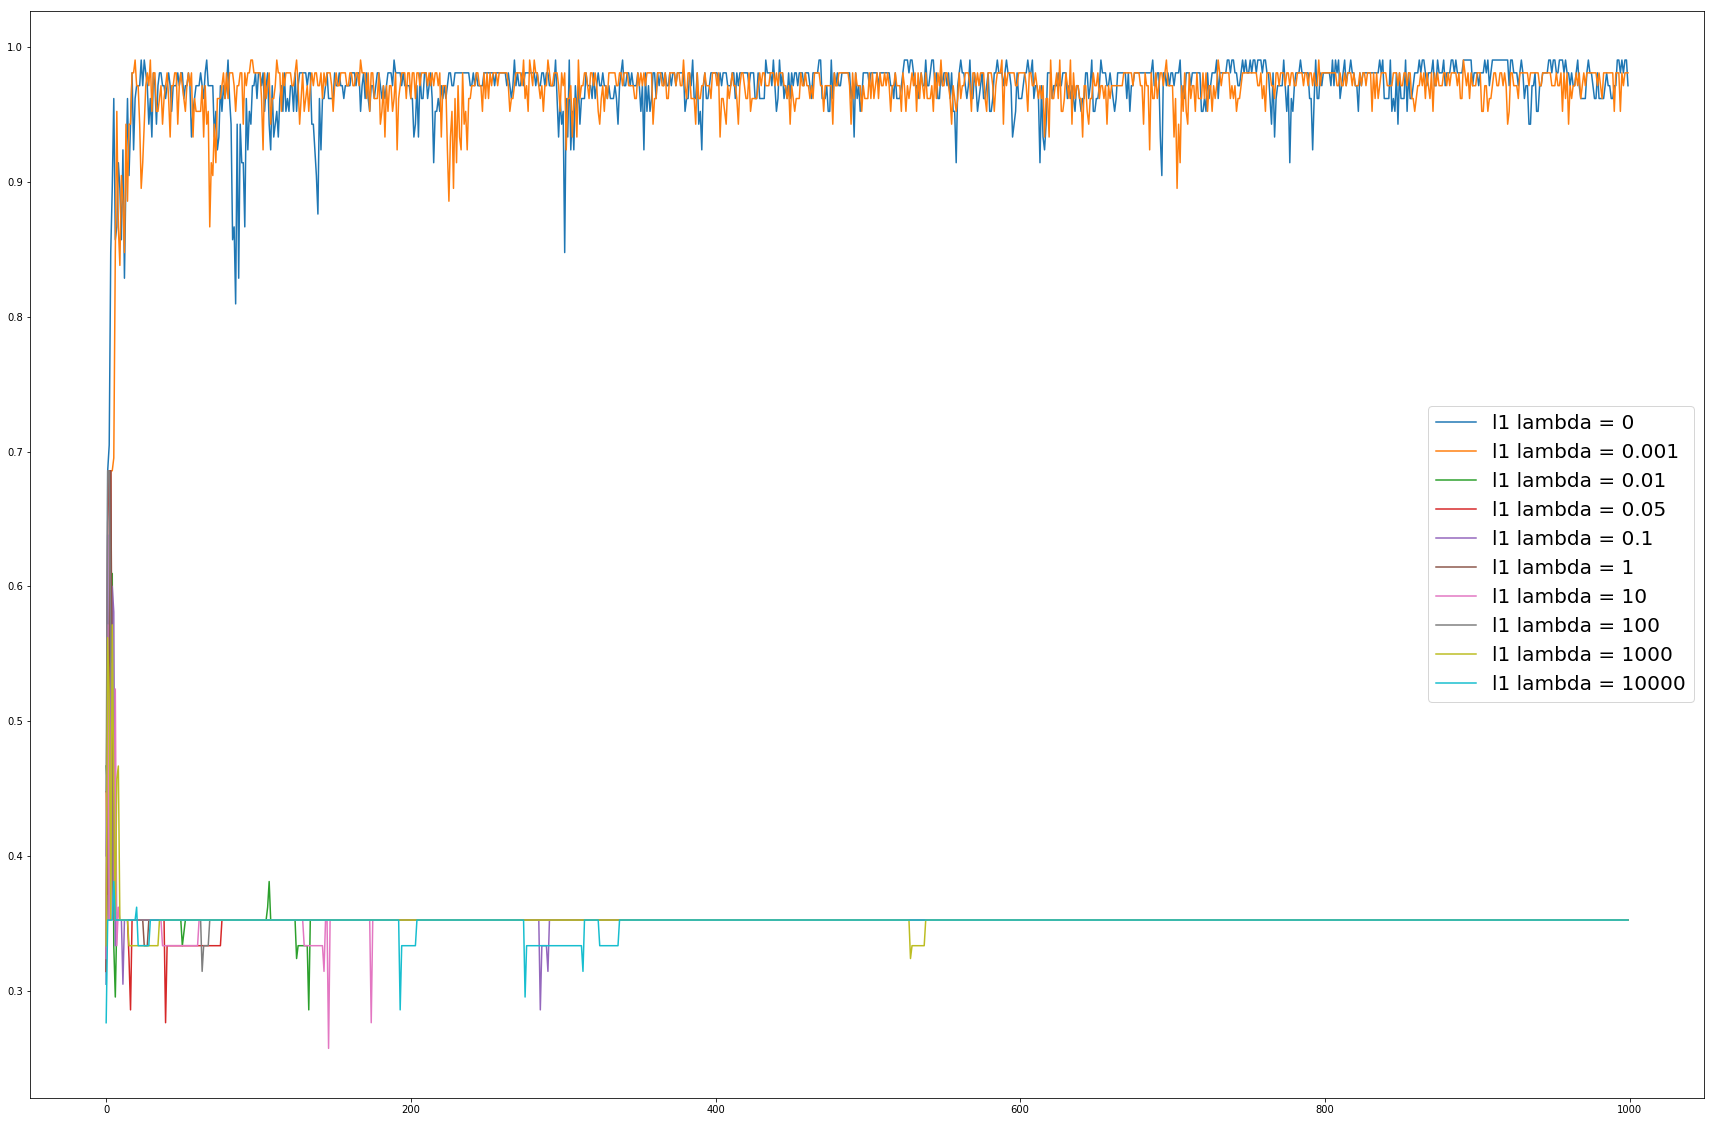

In [12]:
# Create model with different lambda l1
plt.figure(figsize = (30,20))
for i in [0,0.001, 0.01, 0.05, 0.1, 1, 10, 100, 1000, 10000]:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu, 
                              input_shape=(4,), 
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l1(i)
                             ),
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu,                               
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l1(i)
                             ),
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu,                               
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l1(i)
                             ),
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu,                               
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l1(i)
                             ),
        tf.keras.layers.Dense(3,activation='softmax')
    ])

    model.compile(optimizer = "adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    acc = model.fit(trainX, trainY, epochs=1000,verbose=0)
    test_loss, test_acc = model.evaluate(testX,  testY, verbose=0)
    print("l1 lambda {} accuracy = {}".format(i,test_acc))
    plt.plot(acc.history['acc'],label = 'l1 lambda = {}'.format(i))    
plt.legend(fontsize = 20)

l1 lambda 0 accuracy = 0.977777779102
l1 lambda 0.001 accuracy = 0.977777779102
l1 lambda 0.01 accuracy = 0.977777779102
l1 lambda 0.05 accuracy = 1.0
l1 lambda 0.1 accuracy = 0.288888901472
l1 lambda 1 accuracy = 0.288888901472
l1 lambda 10 accuracy = 0.288888901472
l1 lambda 100 accuracy = 0.288888901472
l1 lambda 1000 accuracy = 0.288888901472
l1 lambda 10000 accuracy = 0.288888901472


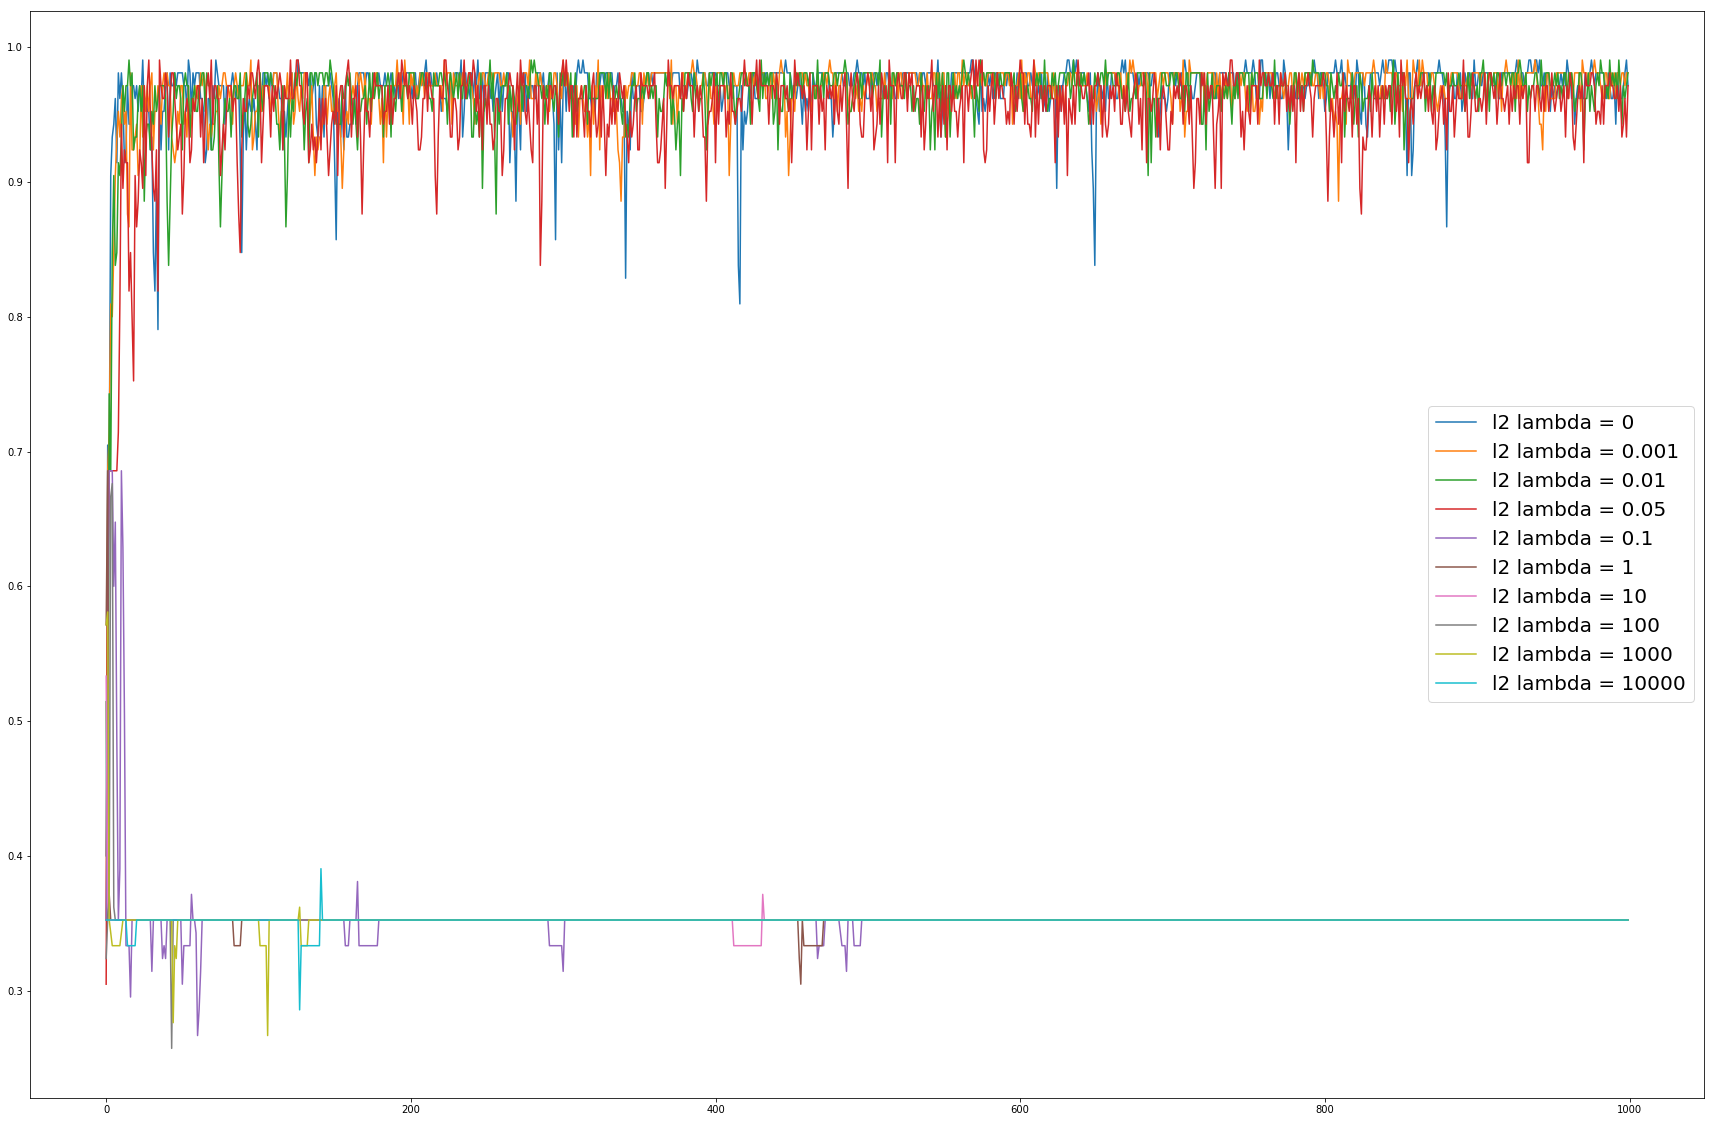

In [13]:
# Create model with different lambda l2
plt.figure(figsize = (30,20))
for i in [0,0.001, 0.01, 0.05, 0.1, 1, 10, 100, 1000, 10000]:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu, 
                              input_shape=(4,), 
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l2(i)
                             ),
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu,                               
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l2(i)
                             ),
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu,                               
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l2(i)
                             ),
        tf.keras.layers.Dense(units = 500, 
                              activation = tf.nn.relu,                               
                              kernel_initializer = tf.initializers.RandomUniform(),
                              kernel_regularizer = tf.keras.regularizers.l2(i)
                             ),
        tf.keras.layers.Dense(3,activation='softmax')
    ])

    model.compile(optimizer = "adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    acc = model.fit(trainX, trainY, epochs=1000,verbose=0)
    test_loss, test_acc = model.evaluate(testX,  testY, verbose=0)
    print("l1 lambda {} accuracy = {}".format(i,test_acc))
    plt.plot(acc.history['acc'],label = 'l2 lambda = {}'.format(i))    
plt.legend(fontsize = 20)

In [20]:
'''
    l1 regularization
        Lasso regression (Least Absolute Shrinkage and Selection Operator)
            The sum of the absolute value of magnitude(w)
            sum ( lambda  * Abs(w) )
    
    l2 regularization
        Ridge regression
            The sum of the squared magnitude(w)
            sum ( lambda * w * w)

'''

<tf.Variable 'dense_122/kernel:0' shape=(500, 500) dtype=float32, numpy=
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-4.5633388e-15, -2.2549360e-15,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00, -8.7476887e-15],
       [ 4.3546508e-12,  3.9346337e-14,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00, -9.1713713e-13],
       ...,
       [ 9.3397241e-14, -2.9714932e-14,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  6.1892969e-15],
       [-1.1315930e-14, -6.5469279e-12, -5.9209526e-10, ...,
         0.0000000e+00, -0.0000000e+00, -2.0729187e-12],
       [ 4.0024722e-13,  3.0315132e-11,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00, -5.3379019e-13]], dtype=float32)>
